## Lactic Acid: Transfer Component Analysis (TCA)

In [49]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression as PLSR
from traintest import *
from visualization import *
from dataloader import DataLoad
from tca import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1. Loading Data

In [50]:

D = DataLoad(glucose=False)
D.load_data()
Xs, ys, Xt, yt, wl = D.X_source, D.y_source, D.X_target, D.y_target, D.wl

### 2. Training Model on Source Data and Test on Target Data (Baseline Model, No Domain Adaptation)

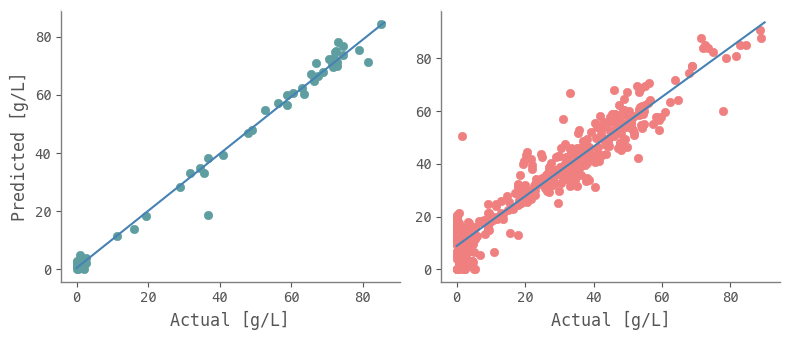

  Test on Model  R-sq     RMSE RMSEP [%]  RPD
0  Source  PLSR  0.99  3.37079    3.9681  9.0
1  Target  PLSR  0.79  9.41562  10.59502  2.2


In [51]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.2, random_state=42)
models = train(Xs_train, ys_train, plsr_comp=12)
print(test(models, Xs_test, ys_test, Xt, yt))

### 3. Evaluate Domain Adaptation Performance of TCA

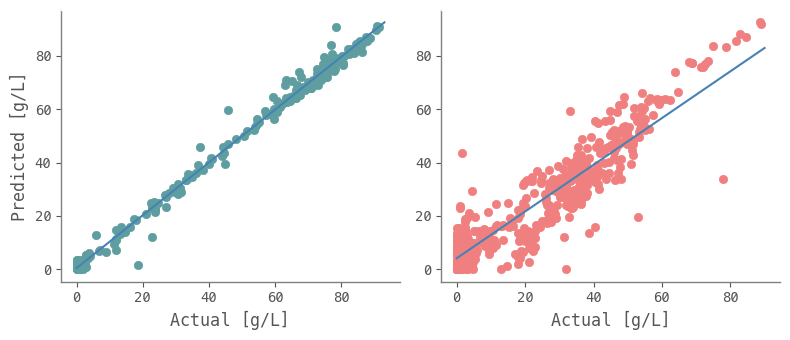

  Test on Model  R-sq     RMSE RMSEP [%]   RPD
0  Source  PLSR  0.99  2.85729   3.12421  10.8
1  Target  PLSR  0.85  7.76139   8.73358   2.6


In [52]:
# TCA transform
tca = TCA(kernel_type='rbf', dim=15, lamb=0.001, gamma=0.01)
Xs_new, Xt_new = tca.fit_transform(Xs_train, Xt)


models = train(Xs_new, ys_train, plsr_comp=14)
print(test(models, Xs_new, ys_train, Xt_new, yt))